In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


city_data_df = pd.read_csv(city_data_to_load)


In [5]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()


ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

pyber_data = pd.merge(ride_data_df, city_data_df, on="city")


pyber_data2 = pyber_data.drop_duplicates('city')

pyber_data2=pyber_data2.reset_index(drop=True)
pyber_data2.head(5)



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [7]:
# Obtain the x and y coordinates for each of the three city types
x_axis = pyber_data.groupby(by="city")["ride_id"].count()

# y: average fare in each city
y_axis = round(pyber_data .groupby(by='city')['fare'].mean(),2)
z_axis = pyber_data.drop_duplicates(subset='city', keep='first').set_index('city')['driver_count']*15
type_list = pyber_data.drop_duplicates(subset='city', keep='first').set_index('city')['type']


bubbleData_df = pd.DataFrame({'x':x_axis,'y':y_axis,'z':z_axis,'City Type':type_list})

# create color list
color_list = {'Urban':'gold', 'Suburban':'lightcoral', 'Rural':'lightskyblue'}






/Users/SLayachi/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


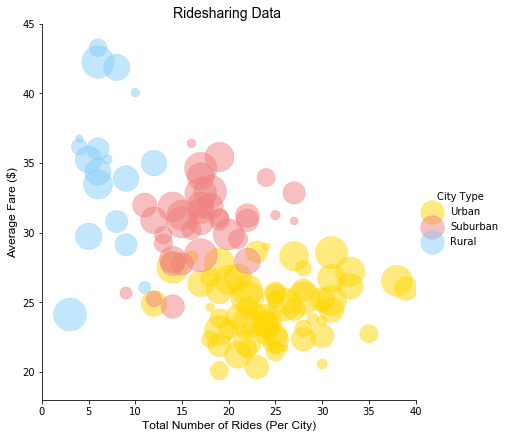

In [11]:
# Show plot
bubblePlot=sns.lmplot(x='x', y='y', data=bubbleData_df, hue='City Type', palette=color_list,\
                      fit_reg=False, size=6,\
                      legend=True,legend_out=True,\
                      scatter_kws={'s':z_axis,'alpha':0.5, 'edgecolors':'face', 'linewidths':0.5})
plt.xlim(0,40)
plt.ylim(18,45)
plt.title("Ridesharing Data ",{'fontname':'Arial','fontsize':14})
plt.xlabel("Total Number of Rides (Per City)",{'fontname':'Arial','fontsize':12})
plt.ylabel("Average Fare ($)",{'fontname':'Arial','fontsize':12})
plt.show()

## Total Fares by City Type

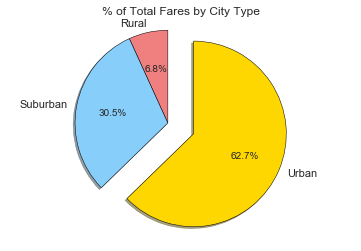

In [65]:

Group_Type =pyber_data.groupby('type')['type', 'fare', 'ride_id', 'driver_count']

#total fare by city
fare_sum = Group_Type.sum()['fare']

#colors and exploe the same for all pie charts, reference here
labels = fare_sum.index
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
city_color = {'Urban': color_scheme['Gold'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Light Coral']}

#pie chart build
colors = [city_color[n] for n in labels]
explode = [0 , 0, .3]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})

#pie chart display
plt.title('% of Total Fares by City Type')
plt.axis('equal')
plt.show()
# Build Pie Chart

# Save Figure


In [66]:
# Show Figure


## Total Rides by City Type

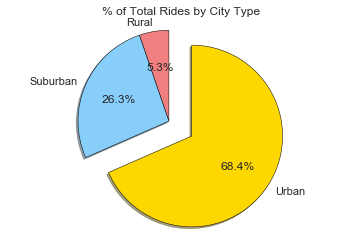

In [37]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure
ride_sum = Group_Type.count()['ride_id']

labels = ride_sum.index
plt.pie(ride_sum, startangle = 90, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')
plt.show()

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

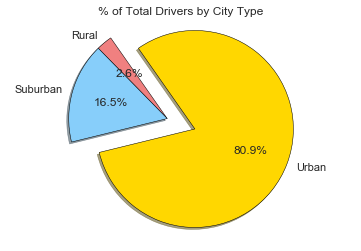

In [38]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure

driver_sum = pyber_data2.groupby('type').sum()['driver_count']

labels = driver_sum.index
plt.pie(driver_sum, startangle = 125, explode = explode, colors = colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')
plt.show()

In [13]:
# Show Figure
plt.show()
